## 0. Importación de Librerías.

- ydata-profiling es útil para explorar y analizar conjuntos de datos, incluidos los datos de texto. Proporciona una variedad de estadísticas y visualizaciones útiles para comprender la distribución y las características de los datos de texto. También puede ayudar a identificar problemas comunes en los datos de texto, como valores perdidos o valores atípicos.

- contractions es útil para expandir contracciones en texto. Por ejemplo, la palabra "can't" se puede expandir a "cannot". Esta biblioteca puede ser útil en tareas de análisis de sentimientos o clasificación de texto, donde es importante capturar el significado completo de las palabras.

- nltk (Natural Language Toolkit) proporciona una variedad de herramientas para el preprocesamiento de texto, como tokenización, lematización, eliminación de stopwords y etiquetado POS (part-of-speech). También proporciona una variedad de modelos y corpus de texto, que pueden ser útiles para tareas de procesamiento de texto, como la clasificación de texto o la generación de lenguaje natural.


In [1]:
!pip install ydata-profiling
!pip install contractions
import nltk
nltk.download('all')

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 345.9/345.9 KB 6.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 33.8/33.8 MB 29.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.5/78.5 KB 2.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 18.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.7/102.7 KB 7.6 MB/s eta 0:00:00
  Attempting uninstall: tqdm
    Found existing installation: tqdm 4.65.0
    Uninstalling tqdm-4.65.0:
      Successfully uninstalled tqdm-4.65.0
  Attempting uninstall: scipy
    Found existing installation: scipy 1.10.1
    Uninstalling scipy-1.10.1:
      Successfully uninstalled scipy-1.10.1
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.7.1
    Uninstalling matplotlib-3.7.1:
      Successfully uninstalled matplotlib-3.7.1
  Attempting uninstall: visions

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping grammars/basque_grammars.zip.
[nltk_data]    | Downloading package bcp47 to /root/nltk_data...
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   U

True

In [2]:
!pip install wordcloud

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Librerías necesarias para el desarrollo del laboratorio. Estas nos ayudarán al manejo de dataframes, visualización y perfilamiento de datos, procesamiento de lenguaje natural y construcción modelos de machine learning.

In [3]:
#Manejo de datos
import pandas as pd
import numpy as np

#Visualización de datos
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import re, string, unicodedata
import contractions
import inflect # Correctly generate plurals, singular nouns, ordinals, indefinite articles; convert numbers to words.
from nltk import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer, WordNetLemmatizer
from wordcloud import WordCloud, STOPWORDS

#Analisis profundo de datos
from ydata_profiling import ProfileReport

#Entrenamiento del modelo
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.base import BaseEstimator,TransformerMixin
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier

## 1. Entendimiento del Negocio

En este caso se eligió trabajar con los datos referentes a comentarios acerca de películas y estos comentarios pueden ser negativos o positivos. Por lo tanto , el objetivo principal de esta solución es tratar de predecir si un comentario es negativo o positivo con la mayor precisión posible.


**Datos**: MovieReviews.csv

## 2. Entendimiento de los Datos

Luego de entender el negocio y su objetivo, vamos a realizar la exploración de datos. Así que, leeremos los datos.

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
# Leer e ignorar columnas sin nombre.
df_Big_AHR = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Proyecto1/MovieReviews.csv",  index_col=False)
df_Big_AHR.head() #Veremos las primeras líneas del dataset, para ver si leyó correctamente

,Unnamed: 0,review_es,sentimiento
0,0,Si está buscando una película de guerra típica...,positivo
1,1,Supongo que algunos directores de películas de...,positivo
2,2,Es difícil contarle más sobre esta película si...,positivo
3,3,"La película comienza muy lentamente, con el es...",positivo
4,4,Esta película es verdadera acción en su máxima...,positivo


In [6]:
# Eliminar columna Unnamed: 0
df_Big_AHR = df_Big_AHR.drop(['Unnamed: 0'], axis=1)
df_Big_AHR.head()

,review_es,sentimiento
0,Si está buscando una película de guerra típica...,positivo
1,Supongo que algunos directores de películas de...,positivo
2,Es difícil contarle más sobre esta película si...,positivo
3,"La película comienza muy lentamente, con el es...",positivo
4,Esta película es verdadera acción en su máxima...,positivo


In [7]:
# Total de registros y columnas
df_Big_AHR.shape

(5000, 2)

Dividir los datos en conjuntos de entrenamiento (train) y prueba (test) es un paso crítico en la modelización de datos, incluyendo en el procesamiento de texto. La razón principal para hacer esto es que permite evaluar la capacidad predictiva de un modelo de aprendizaje automático. Procederemos a hacer la división 

In [8]:
train, test = train_test_split(df_Big_AHR, test_size=0.2, random_state=33)
train.head()

,review_es,sentimiento
2435,¿Qué puedo decir al respecto? Es otra película...,positivo
188,"Se emitió en la televisión ayer, así que decid...",positivo
3507,Me vio obligado a ver 'Changi' el año pasado e...,negativo
124,"Acabo de capturar un episodio sobre Brad, el a...",positivo
4005,"Aquí está lo que es bueno acerca de ""la regla ...",negativo


Utilizaremos la libreria de `pandas-profiling` para realizar una exploración de datos más profunda

In [9]:
ProfileReport(train)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

El conjunto de datos es un conjunto de reviews de películas que tienen las siguientes características:

- Duplicados: El conjunto de datos contiene solo 2 filas duplicadas , por lo tanto no se ve tanta importancia en quitarlas , ya que existen 4000 datos en total en el dataset del train.

- Alta cardinalidad: La columna de review tienen un total de cardinalidad de 3999 lo cuál nos indica que a excepción de una review todas las reviews son distintas

- Valores faltantes: No hay valores faltantes en ninguna de las dos columnas.

- Distribución uniforme: La columna de texto de la reseña está uniformemente distribuida, lo que indica que cada valor único aparece aproximadamente la misma cantidad de veces en el conjunto de datos.

In [10]:
# Generar una representación visual de las palabras más comunes en el conjunto de datos palabras en forma de nube de palabras.

def show_word_cloud(palabras,stopwords=[]):
    comment_words = ''
    
    # Iterar por cada palabra
    for val in palabras:
        
        # Convertir a cadena de texto en casos de ser necesario
        val = str(val)
    
        # Generar tokens
        tokens = val.split()
        
        # Convertir cada token a letras minúsculas
        for i in range(len(tokens)):
            tokens[i] = tokens[i].lower()
        
        # Recrear la cadena de texto
        comment_words += " ".join(tokens)+" "
    
    # Construir la nube de palabras
    wordcloud = WordCloud(width = 600, height = 600,
                    background_color ='white',
                    stopwords = stopwords,
                    min_font_size = 10).generate(comment_words)
    
    # Mostrar la nube de palabras                    
    plt.figure(figsize = (8, 8), facecolor = None)
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.tight_layout(pad = 0)
    
    plt.show()

Un `WordCloud` es una herramienta que permite visualizar las palabras más frecuentes de un conjunto de datos de texto de forma gráfica y atractiva. Al generar un WordCloud para cada categoría de un conjunto de datos, es posible identificar las palabras que se repiten con mayor frecuencia en cada una de ellas, lo que puede ayudar a comprender mejor los temas y el lenguaje asociado a cada categoría. Esto permite realizar un análisis de las palabras más recurrentes en cada categoría y obtener información relevante sobre los patrones de lenguaje y el contenido en general.

---------- Palabras de la clase: positivo: positivo ----------


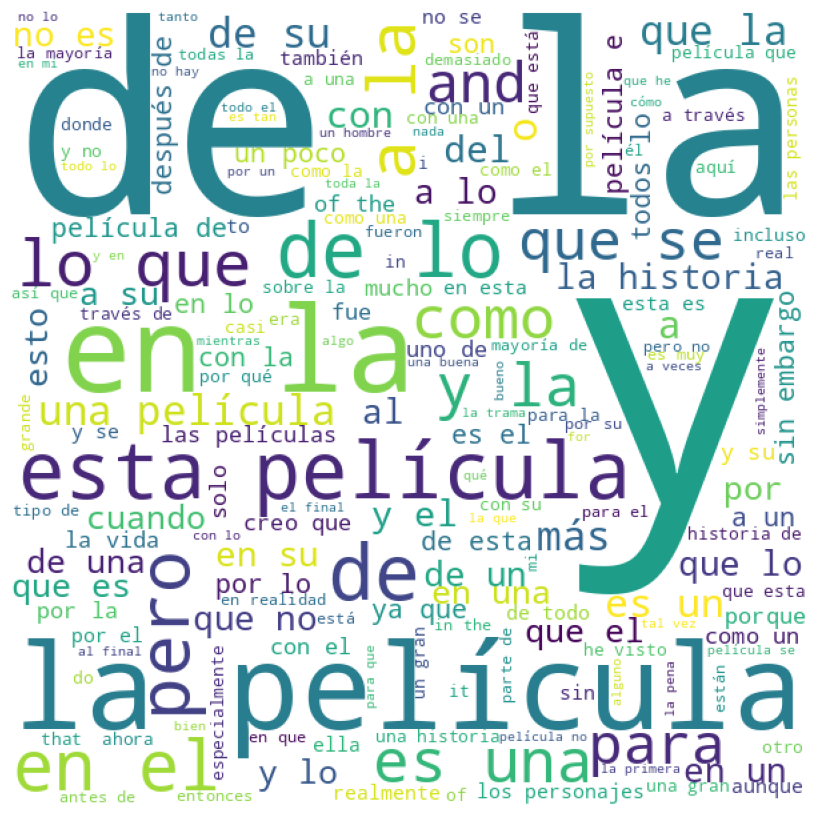

---------- Palabras de la clase: negativo: negativo ----------


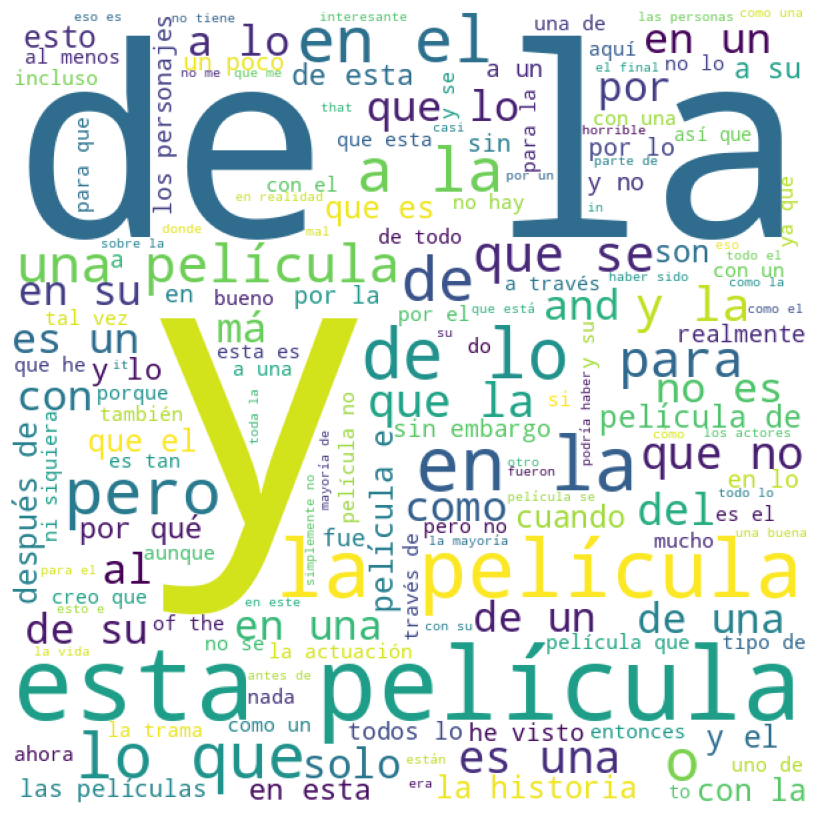

In [11]:
diccionario_clases = {'negativo':'negativo', 'positivo':'positivo'}

for i in train['sentimiento'].unique():
    print(f'---------- Palabras de la clase: {i}: {diccionario_clases[i]} ----------')
    show_word_cloud(train.loc[train['sentimiento']==i,'review_es'])

Al trabajar con textos, es común encontrar palabras que se repiten con mucha frecuencia pero que no aportan mucho significado al análisis. Estas palabras, como por ejemplo los artículos, pronombres o preposiciones, se conocen como `stopwords`. En este caso, al no haber utilizado una lista de `stopwords` para eliminar estas palabras de los textos analizados, se observa que muchas de las palabras más frecuentes son efectivamente artículos, lo cual puede distorsionar el análisis de los datos y hacer que sea más difícil identificar las palabras clave que realmente importan.

---------- Palabras de la clase: positivo: positivo ----------


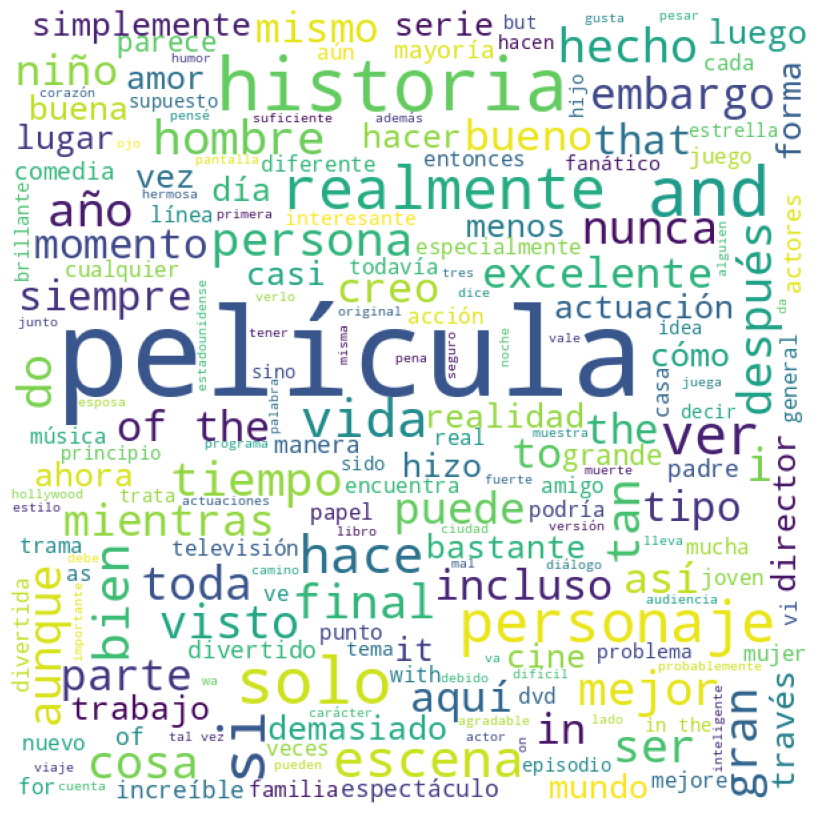

---------- Palabras de la clase: negativo: negativo ----------


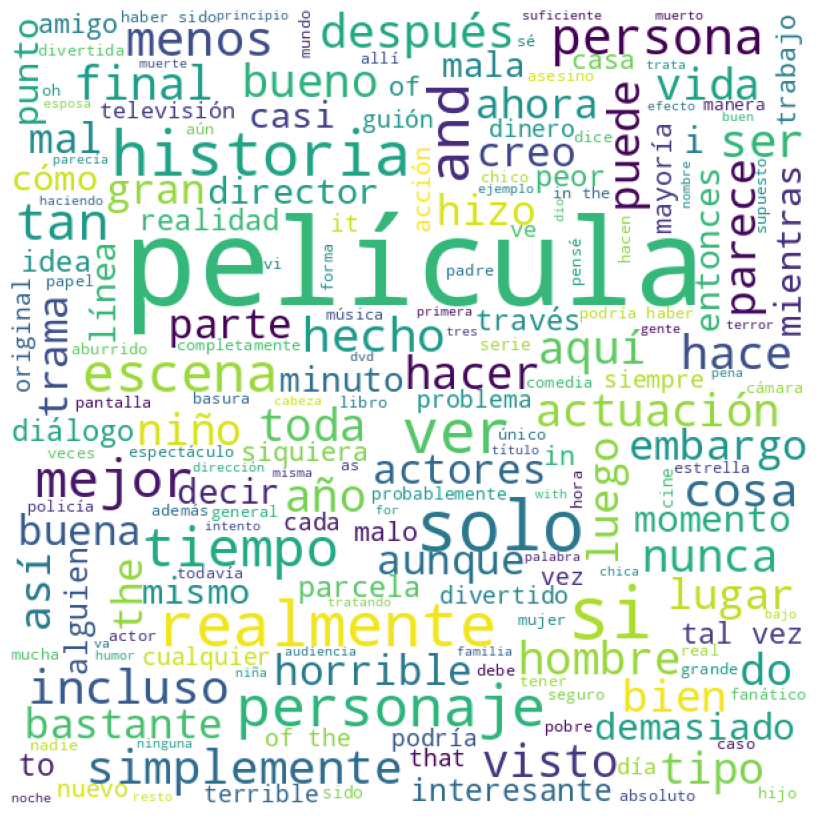

In [12]:
# Las reseñas están en español
stop_words = stopwords.words('spanish')

for i in train['sentimiento'].unique():
    print(f'---------- Palabras de la clase: {i}: {diccionario_clases[i]} ----------')
    show_word_cloud(train.loc[train['sentimiento']==i,'review_es'], stop_words)

### Entendimiento palabras clave

<p>Se puede ver que en ambas clases resalta en gran medida la palabra película y más secundariamente las palabras historia y personaje. </p>

<h2> Positivo </h2>
<p> En las reviews que son positivas, además de las tres palabras antes mencionadas están palabras como: mejor, realemente, simplemente, si, escena, ver,hombre, etc.</p>

<h2> Negativo </h2>
<p>En las reviews que son negativas, además de las tres palabras antes mencionadas están palabras como: ver, simplemente, escena, final, persona, menos, nunca , tan, etc. </p>

## 3. Preparación de los datos

In [13]:
# Observar el conjunto de datos resultante
train.head()

,review_es,sentimiento
2435,¿Qué puedo decir al respecto? Es otra película...,positivo
188,"Se emitió en la televisión ayer, así que decid...",positivo
3507,Me vio obligado a ver 'Changi' el año pasado e...,negativo
124,"Acabo de capturar un episodio sobre Brad, el a...",positivo
4005,"Aquí está lo que es bueno acerca de ""la regla ...",negativo


Dividimos el conjunto de datos de entrenamiento en X_train, y_train

In [14]:
X_train, y_train = train['review_es'], train['sentimiento'] 
display(X_train)
y_train

2435    ¿Qué puedo decir al respecto? Es otra película...
188     Se emitió en la televisión ayer, así que decid...
3507    Me vio obligado a ver 'Changi' el año pasado e...
124     Acabo de capturar un episodio sobre Brad, el a...
4005    Aquí está lo que es bueno acerca de "la regla ...
                              ...                        
57      Me encantan las películas de Michael Landon Jr...
3273    The only reason any of the hundred or so users...
2706    No malas actuaciones.Whoopi juega el papel sab...
578     Para el registro, soy un abanico rizado a trav...
2439    "Der TDESKING", el segundo película de largome...
Name: review_es, Length: 4000, dtype: object

2435    positivo
188     positivo
3507    negativo
124     positivo
4005    negativo
          ...   
57      positivo
3273    negativo
2706    negativo
578     positivo
2439    positivo
Name: sentimiento, Length: 4000, dtype: object

#### Procesamiento común en NLP (Natural Language Processing)

El pre-procesamiento de datos es una etapa importante en el procesamiento de lenguaje natural, ya que permite transformar los datos textuales en un formato más manejable y útil para el análisis. Esta tarea se realiza en tres etapas principales: 

* 1. Eliminación del Ruido.
* 2. Tokenización.
* 3. Normalización.

La eliminación del ruido implica la eliminación de cualquier información que no sea relevante para el análisis, como etiquetas HTML, símbolos de puntuación, números, caracteres especiales, etc. Esto ayuda a reducir la cantidad de datos que el modelo tendrá que procesar y puede mejorar la precisión del análisis.

La tokenización se refiere al proceso de dividir el texto en palabras individuales o tokens. Esto ayuda a identificar las palabras clave y los patrones de lenguaje que pueden ser relevantes para el análisis. También ayuda a convertir el texto en un formato más estructurado que el modelo puede procesar.

La normalización se utiliza para hacer que el texto sea más uniforme en términos de formato y estilo de escritura. Esto puede incluir la eliminación de mayúsculas y minúsculas, la eliminación de palabras vacías, la corrección ortográfica, la lematización, la eliminación de prefijos y sufijos, entre otras técnicas. La normalización ayuda a reducir la complejidad del texto y a garantizar que los patrones de lenguaje se puedan identificar de manera más efectiva.

En conjunto, estas tres etapas son cruciales para preparar los datos de texto para el análisis. Al realizar estas tareas, se pueden eliminar ruidos innecesarios, dividir el texto en unidades más manejables y uniformizar el formato para que se pueda analizar con mayor precisión.

#### **3.1 Eliminación del Ruido**
Las siguientes funciones se utilizan para eliminar el ruido de los datos de texto:

- La primera función, `remove_non_ascii`, elimina los caracteres que no pertenecen al conjunto ASCII de una lista de palabras tokenizadas. Esto ayuda a evitar problemas de codificación y asegura que las palabras estén en un formato uniforme.

- La segunda función, `to_lowercase`, convierte todos los caracteres de una lista de palabras tokenizadas a minúsculas. Esto ayuda a tratar todas las palabras como iguales, independientemente de si están en mayúsculas o minúsculas.

- La tercera función, `remove_punctuation`, elimina la puntuación de una lista de palabras tokenizadas. Esto ayuda a reducir el ruido y a tratar las palabras como unidades separadas.

- La cuarta función, `replace_numbers`, reemplaza los números en una lista de palabras tokenizadas con su representación textual. Esto ayuda a tratar los números como palabras y a simplificar la representación de las palabras en el análisis de sentimiento. Sin embargo, esta función no se está utilizando en el preprocesamiento actual.

- La quinta función, `remove_stopwords`, elimina las palabras vacías o de parada de una lista de palabras tokenizadas. Las palabras vacías son palabras comunes que no tienen mucho significado por sí solas, como "el", "la", "de", etc. Al eliminar estas palabras, se reduce el ruido y se enfoca en las palabras clave para el análisis de sentimiento.

- Finalmente, la función `preprocessing` combina todas estas funciones en una sola función que realiza el preprocesamiento completo en una lista de palabras tokenizadas. En este caso, las funciones de to_lowercase, remove_punctuation, remove_non_ascii y remove_stopwords se aplican en ese orden.

In [15]:
def remove_non_ascii(words):
    """Elimina los caracteres no ASCII de una lista de palabras tokenizadas"""
    new_words = []
    for word in words:
        new_word = unicodedata.normalize('NFKD', word).encode('ascii', 'ignore').decode('utf-8', 'ignore')
        new_words.append(new_word)
    return new_words

def to_lowercase(words):
    """Convierte todos los caracteres de una lista de palabras tokenizadas a minúsculas"""
    new_words = []
    for word in words:
        new_word = word.lower()
        new_words.append(new_word)
    return new_words

def remove_punctuation(words):
    """Elimina la puntuación de una lista de palabras tokenizadas"""
    new_words = []
    for word in words:
        new_word = re.sub(r'[^\w\s]', '', word)
        if new_word != '':
            new_words.append(new_word)
    return new_words

def replace_numbers(words):
    """Reemplaza todas las ocurrencias de números enteros en una lista de palabras tokenizadas con su representación textual"""
    p = inflect.engine()
    new_words = []
    for word in words:
        if word.isdigit():
            new_word = p.number_to_words(word)
            new_words.append(new_word)
        else:
            new_words.append(word)
    return new_words

def remove_stopwords(words, stopwords=stopwords.words('spanish')):
    """Elimina las palabras vacías de una lista de palabras tokenizadas"""
    new_words = []
    for word in words:
        if word not in stopwords:
            new_words.append(word)
    return new_words

def preproccesing(words):
    words = to_lowercase(words)
    #words = replace_numbers(words)
    words = remove_punctuation(words)
    words = remove_non_ascii(words)
    words = remove_stopwords(words)
    return words

#### **3.2 Tokenización**
Es importante porque es el proceso de dividir el texto en unidades discretas llamadas tokens. Estos tokens son palabras, signos de puntuación y otros elementos que componen el texto.

La tokenización  permite que el modelo comprenda la estructura del texto y la relación entre las palabras. lo que es esencial en tareas como la clasificación de texto.

In [16]:

# Utilizar la función word_tokenize de la librería nltk para dividir el texto en palabras individuales
# aplicar esta función a cada registro de X_train.
new_X_train = X_train.apply(word_tokenize)

# Aplicar la función preproccesing a cada registro de new_X_train
new_X_train = new_X_train.apply(preproccesing) #Aplica la eliminación del ruido

new_X_train.head()

2435    [puedo, decir, respecto, pelicula, horror, hol...
188     [emitio, television, ayer, asi, decidi, revisa...
3507    [vio, obligado, ver, changi, ano, pasado, ano,...
124     [acabo, capturar, episodio, brad, adicto, coca...
4005    [aqui, bueno, acerca, regla, matadero, ryan, g...
Name: review_es, dtype: object

#### **3.3 Normalización**
La normalización reduce la variabilidad de las palabras y permite que el modelo pueda tratar con ellas de manera más efectiva. 

Las palabras pueden aparecer en diferentes formas debido a su género, tiempo verbal, número, conjugación, etc. Por ejemplo, la palabra "correr" puede aparecer como "corro", "corre", "corrieron", etc. La normalización se refiere al proceso de transformar todas estas formas diferentes de una palabra en su forma base o raíz, también conocida como lematización o stemming. Esto permite que el modelo considere todas las formas de la misma palabra como iguales, lo que puede mejorar significativamente la precisión de los análisis de texto. 

Además, la normalización también puede incluir la eliminación de prefijos y sufijos y la corrección de errores ortográficos, lo que puede reducir aún más la variabilidad de las palabras y mejorar la calidad del análisis.

In [17]:
def stem_words(words):
    """Obtiene la raíz de las palabras en la lista de palabras tokenizadas"""
    stemmer = SnowballStemmer('spanish')
    stems = []
    for word in words:
        stem = stemmer.stem(word)
        stems.append(stem)
    return stems

def lemmatize_verbs(words):
    """Lematiza los verbos en la lista de palabras tokenizadas"""
    lemmatizer = WordNetLemmatizer()
    lemmas = []
    for word in words:
        lemma = lemmatizer.lemmatize(word, pos='v')
        lemmas.append(lemma)
    return lemmas

def stem_and_lemmatize(words):
    words = stem_words(words)
    words = lemmatize_verbs(words)
    return words

new_X_train = new_X_train.apply(stem_and_lemmatize) #Aplica lematización y obtiene la raíz de las palabras.
new_X_train.head()

2435    [pued, dec, respect, pelicul, horror, hollywoo...
188     [emiti, television, ayer, asi, decidi, revis, ...
3507    [vio, oblig, ver, changi, ano, pas, ano, 10, h...
124     [acab, captur, episodi, brad, adict, cocain, c...
4005    [aqui, buen, acerc, regl, matader, ryan, gosli...
Name: review_es, dtype: object

#### **Transformación de campos**

In [18]:
# Crear una nueva columna en el dataframe 'train' llamada 'trans'.
# Aplicar la función lambda en cada fila de la columna 'new_X_train' y convierte la lista de palabras en una cadena de texto utilizando la función 'join'.
train['trans'] = new_X_train.apply(lambda x: ' '.join(map(str, x)))

In [19]:
# Primero title_and_review_text, luego trans, luego label
train = train[["review_es", "trans", "sentimiento"]]

train.head()

,review_es,trans,sentimiento
2435,¿Qué puedo decir al respecto? Es otra película...,pued dec respect pelicul horror hollywood pres...,positivo
188,"Se emitió en la televisión ayer, así que decid...",emiti television ayer asi decidi revis ultim p...,positivo
3507,Me vio obligado a ver 'Changi' el año pasado e...,vio oblig ver changi ano pas ano 10 histori au...,negativo
124,"Acabo de capturar un episodio sobre Brad, el a...",acab captur episodi brad adict cocain crack co...,positivo
4005,"Aquí está lo que es bueno acerca de ""la regla ...",aqui buen acerc regl matader ryan gosling cle ...,negativo


CountVectorizer permite convertir las opiniones de los usuarios preprocesadas en un vector de características numéricas. Especificamente permite convertir una colección de documentos de texto en una matriz de recuento de términos/documentos. Cada columna de la matriz representa una palabra en el vocabulario y cada fila representa una opinión de un usuario. Los valores en la matriz son el recuento de ocurrencias de cada palabra en cada opinión de usuario.

El parámetro binary=True indica que solo se debe contar la presencia o ausencia de cada palabra en lugar de contar el número de veces que aparece en cada opinión.

In [20]:
# Crear una matriz de presencia o ausencia
dummy = CountVectorizer(binary=True)
# Entrenar la matriz de presencia o ausencia
X_dummy = dummy.fit_transform(train['trans'])

# Forma de la matriz resultante
print(X_dummy.shape)
# Ver la representación de características de la primera opinión de usuario
X_dummy[0]

(4000, 39378)


<1x39378 sparse matrix of type '<class 'numpy.int64'>'
	with 56 stored elements in Compressed Sparse Row format>

También podemos utiliizar Conunt vectorizer para contar el número de veces que aparece en cada opinión. Así tendremos X_dummy y X_count. Dos representacións de los datos de entrenamiento que se utilizarán para entrenar el modelo.

In [21]:
# Crear una matriz de recuento de palabras
count = CountVectorizer()
# Entrenar la matriz de recuento de palabras
X_count = count.fit_transform(train['trans'])

# Forma de la matriz resultante
print(X_count.shape)

(4000, 39378)


Una tercera representación que podemos utilizar es la Matriz TFIDF (Term Frequency-Inverse Document Frequency). Esta matriz es una representación numérica de un documento que refleja la importancia de cada palabra en el documento. La importancia de una palabra aumenta proporcionalmente al número de veces que aparece en el documento, pero se compensa por la frecuencia de la palabra en el corpus.

In [22]:
# Crear una matriz tf-idf
tf_idf = TfidfVectorizer()
# Entrenar la matriz tf-idf
X_tf_idf = tf_idf.fit_transform(train['trans'])

# Forma de la matriz resultante
print(X_tf_idf.shape)

(4000, 39378)


## 4. Modelado

La preparación de datos es una etapa crucial para poder obtener un modelo preciso y efectivo. Es por eso que se utilizan herramientas como pipelines, que permiten automatizar y estandarizar el proceso de preprocesamiento de los datos y entrenamiento del modelo.

En este caso, utilizaremos nuestro "preparador" de datos que hemos construido previamente, el cual realiza una serie de tareas como tokenización, normalización, eliminación de ruido, lematización y eliminación de prefijos y sufijos. Luego, lo incluiremos en el pipeline para poder realizar la búsqueda del mejor modelo.

El pipeline nos permitirá unificar todo el proceso de preprocesamiento de los datos y entrenamiento del modelo, lo cual es especialmente útil cuando trabajamos con múltiples modelos y queremos comparar su rendimiento. Asimismo, al estandarizar el proceso, nos aseguramos de que los datos sean tratados de manera consistente y reducimos el riesgo de errores o de introducir sesgos en el proceso.

De esta manera, al utilizar el pipeline junto con nuestro preparador de datos, podremos realizar de manera eficiente la búsqueda de nuestro mejor modelo, que nos permitirá predecir con mayor precisión el sentimiento expresado en las reseñas de los clientes.

In [23]:
class TextPreprocessing(BaseEstimator,TransformerMixin):
    def __init__(self,stopwords=stopwords.words('spanish')):
        self.stopwords = stopwords

    # Paso 1: Convertir todos los caracteres a minúsculas
    def to_lowercase(self,words):
        """Convierte todos los caracteres de una lista de palabras tokenizadas a minúsculas"""
        new_words = []
        for word in words:
            new_word = word.lower()
            new_words.append(new_word)
        return new_words

    # Paso 2: Reemplazar los números
    def replace_numbers(self,words):
        """Reemplaza todas las ocurrencias de números enteros en una lista de palabras tokenizadas con su representación textual"""
        p = inflect.engine()
        new_words = []
        for word in words:
            if word.isdigit():
                new_word = p.number_to_words(word)
                new_words.append(new_word)
            else:
                new_words.append(word)
        return new_words

    # Paso 3: Eliminar la puntuación
    def remove_punctuation(self,words):
        """Elimina la puntuación de una lista de palabras tokenizadas"""
        new_words = []
        for word in words:
            new_word = re.sub(r'[^\w\s]', '', word)
            if new_word != '':
                new_words.append(new_word)
        return new_words

    # Paso 4: Eliminar caracteres no ASCII
    def remove_non_ascii(self,words):
        """Elimina los caracteres no ASCII de una lista de palabras tokenizadas"""
        new_words = []
        for word in words:
            new_word = unicodedata.normalize('NFKD', word).encode('ascii', 'ignore').decode('utf-8', 'ignore')
            new_words.append(new_word)
        return new_words

    # Paso 5: Remover stopwords
    def remove_stopwords(self,words, stopwords=stopwords.words('spanish')):
        """Elimina las palabras vacías de una lista de palabras tokenizadas"""
        new_words = []
        for word in words:
            if word not in stopwords:
                new_words.append(word)
        return new_words

    # Paso 6: Aplicar la raíz
    def stem_words(self, words):
        """Palabras clave en la lista de palabras tokenizadas"""
        stemmer = SnowballStemmer('spanish')
        stems = []
        for word in words:
            stem = stemmer.stem(word)
            stems.append(stem)
        return stems

    # Paso 7: Aplicar la lematización
    def lemmatize_verbs(self, words):
        """Lematizar verbos en lista de palabras tokenizadas"""
        lemmatizer = WordNetLemmatizer()
        lemmas = []
        for word in words:
            lemma = lemmatizer.lemmatize(word, pos='v')
            lemmas.append(lemma)
        return lemmas

    # Aplicar la raíz y la lematización: Pasos 6 y 7
    def stem_and_lemmatize(self, words):
        words = self.stem_words(words)
        words = self.lemmatize_verbs(words)
        return words

    
    # Preprocesamiento: Pasos 1-5
    def preproccesing(self, words):
        words = self.to_lowercase(words) # 1
        words = self.replace_numbers(words) # 2
        words = self.remove_punctuation(words) # 3
        words = self.remove_non_ascii(words) # 4    
        words = self.remove_stopwords(words) # 5
        return words

    def fit(self,X,y=None):
        return self
    
    def transform(self,X,y=None):
        new_X_train = pd.Series(X)
        new_X_train = new_X_train.apply(contractions.fix) # Corregir las contracciones
        new_X_train = new_X_train.apply(word_tokenize) #  Tokenizar
        new_X_train = new_X_train.apply(lambda x: self.preproccesing(x)) # Preprocesamiento
        new_X_train = new_X_train.apply(lambda x: self.stem_and_lemmatize(x)) # Aplicar la raíz y la lematización
        new_X_train = new_X_train.apply(lambda x: ' '.join(map(str, x))) # Convertir la lista de palabras en una cadena de texto
        return new_X_train

In [24]:
X_train

2435    ¿Qué puedo decir al respecto? Es otra película...
188     Se emitió en la televisión ayer, así que decid...
3507    Me vio obligado a ver 'Changi' el año pasado e...
124     Acabo de capturar un episodio sobre Brad, el a...
4005    Aquí está lo que es bueno acerca de "la regla ...
                              ...                        
57      Me encantan las películas de Michael Landon Jr...
3273    The only reason any of the hundred or so users...
2706    No malas actuaciones.Whoopi juega el papel sab...
578     Para el registro, soy un abanico rizado a trav...
2439    "Der TDESKING", el segundo película de largome...
Name: review_es, Length: 4000, dtype: object

In [25]:
# Lo de abajo son estimadores para cada modelo, hacer un pipeline para cada uno.

# - Random Forest, Naive Bayes y Adaboosting.
# - CountVectorizer(binary=True), CountVectorizer() y TfidfVectorizer()

### Random Forest

In [26]:
%%time
estimators = [
        ('preproccess',TextPreprocessing()),
        ('transform',CountVectorizer(lowercase=False)),
        ('classifier', RandomForestClassifier(random_state=0))          
    ]

pipe_SVM = Pipeline(estimators)

pipe_SVM.fit(X_train, y_train)

CPU times: user 40.1 s, sys: 226 ms, total: 40.3 s
Wall time: 41.8 s


Pipeline(steps=[('preproccess', TextPreprocessing()),
                ('transform', CountVectorizer(lowercase=False)),
                ('classifier', RandomForestClassifier(random_state=0))])

In [27]:
y_pred_train_SVM = pipe_SVM.predict(X_train)
y_pred_train_SVM

array(['positivo', 'positivo', 'negativo', ..., 'negativo', 'positivo',
       'positivo'], dtype=object)

In [28]:
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues,size=(10,10)):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')



    fig, ax = plt.subplots(figsize=size)
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax


Y ya con nuestros clasificadores entrenados, podemos establecer nuestra **Matriz de Confusión**

Confusion matrix, without normalization


<Axes: title={'center': 'Matriz de Confusión'}, xlabel='Predicted label', ylabel='True label'>

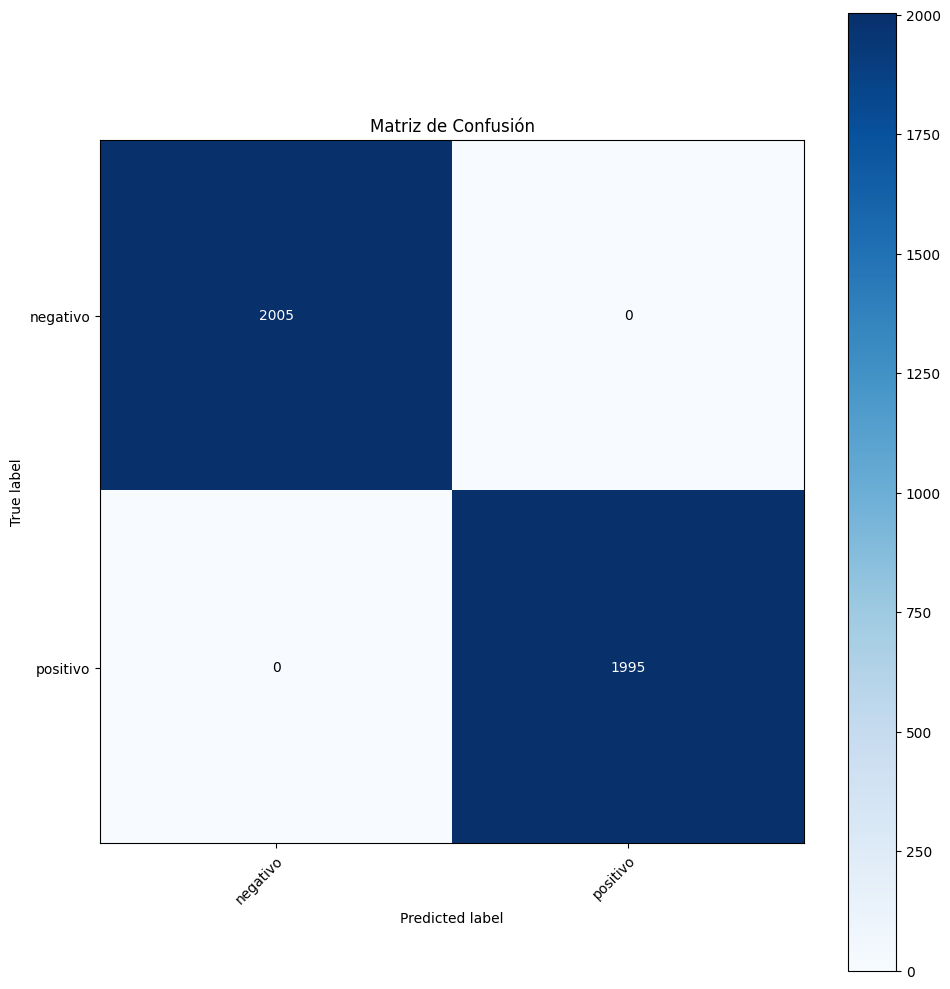

In [29]:
%matplotlib inline

classes = pipe_SVM['classifier'].classes_

plot_confusion_matrix(y_true=y_train, y_pred=y_pred_train_SVM, classes=classes,
                      title='Matriz de Confusión')

In [30]:
report_SVC = classification_report(y_train, y_pred_train_SVM)

print("Train Report for Support Vector Machines\n", report_SVC)

Train Report for Support Vector Machines
               precision    recall  f1-score   support

    negativo       1.00      1.00      1.00      2005
    positivo       1.00      1.00      1.00      1995

    accuracy                           1.00      4000
   macro avg       1.00      1.00      1.00      4000
weighted avg       1.00      1.00      1.00      4000



¿Y si cambiamos el transformador y evaluamos los 3 transformadores que vimos?

In [31]:
parameters = {
              'transform':[CountVectorizer(binary=True,lowercase=False),CountVectorizer(lowercase=False),TfidfVectorizer(lowercase=False)],
              }

grid_search_SVM = GridSearchCV(pipe_SVM, parameters, scoring='precision_macro', cv=5, error_score=0.0)

In [32]:
%%time
grid_search_SVM.fit(X_train,y_train)

CPU times: user 10min 11s, sys: 2.4 s, total: 10min 13s
Wall time: 10min 20s


GridSearchCV(cv=5, error_score=0.0,
             estimator=Pipeline(steps=[('preproccess', TextPreprocessing()),
                                       ('transform',
                                        CountVectorizer(lowercase=False)),
                                       ('classifier',
                                        RandomForestClassifier(random_state=0))]),
             param_grid={'transform': [CountVectorizer(binary=True,
                                                       lowercase=False),
                                       CountVectorizer(lowercase=False),
                                       TfidfVectorizer(lowercase=False)]},
             scoring='precision_macro')

In [33]:
grid_search_SVM.best_estimator_

Pipeline(steps=[('preproccess', TextPreprocessing()),
                ('transform', CountVectorizer(lowercase=False)),
                ('classifier', RandomForestClassifier(random_state=0))])

In [34]:
y_pred_train_MB = grid_search_SVM.best_estimator_.predict(X_train)
report_MB = classification_report(y_train, y_pred_train_MB)

print("Train Report\n", report_MB)

Train Report
               precision    recall  f1-score   support

    negativo       1.00      1.00      1.00      2005
    positivo       1.00      1.00      1.00      1995

    accuracy                           1.00      4000
   macro avg       1.00      1.00      1.00      4000
weighted avg       1.00      1.00      1.00      4000



Ahora, realicemos una búsqueda más profunda.

In [35]:
parameters = {
                'transform':[CountVectorizer(lowercase=False)],
               'classifier__n_estimators' : [10, 100, 1000],
                'classifier__max_features' : ['sqrt', 'log2'],
                'classifier__max_depth' : [10,50,100]
}

grid_search = GridSearchCV(pipe_SVM, parameters, scoring='precision_macro', cv=5, error_score=0.0, verbose=2)

In [36]:
%%time
grid_search.fit(X_train,y_train)

Fitting 5 folds for each of 18 candidates, totalling 90 fits
[CV] END classifier__max_depth=10, classifier__max_features=sqrt, classifier__n_estimators=10, transform=CountVectorizer(lowercase=False); total time=  33.1s
[CV] END classifier__max_depth=10, classifier__max_features=sqrt, classifier__n_estimators=10, transform=CountVectorizer(lowercase=False); total time=  33.9s
[CV] END classifier__max_depth=10, classifier__max_features=sqrt, classifier__n_estimators=10, transform=CountVectorizer(lowercase=False); total time=  34.7s
[CV] END classifier__max_depth=10, classifier__max_features=sqrt, classifier__n_estimators=10, transform=CountVectorizer(lowercase=False); total time=  35.1s
[CV] END classifier__max_depth=10, classifier__max_features=sqrt, classifier__n_estimators=10, transform=CountVectorizer(lowercase=False); total time=  34.2s
[CV] END classifier__max_depth=10, classifier__max_features=sqrt, classifier__n_estimators=100, transform=CountVectorizer(lowercase=False); total tim

GridSearchCV(cv=5, error_score=0.0,
             estimator=Pipeline(steps=[('preproccess', TextPreprocessing()),
                                       ('transform',
                                        CountVectorizer(lowercase=False)),
                                       ('classifier',
                                        RandomForestClassifier(random_state=0))]),
             param_grid={'classifier__max_depth': [10, 50, 100],
                         'classifier__max_features': ['sqrt', 'log2'],
                         'classifier__n_estimators': [10, 100, 1000],
                         'transform': [CountVectorizer(lowercase=False)]},
             scoring='precision_macro', verbose=2)

In [37]:
grid_search.best_params_

{'classifier__max_depth': 50,
 'classifier__max_features': 'sqrt',
 'classifier__n_estimators': 1000,
 'transform': CountVectorizer(lowercase=False)}

Y obtengamos los resultados de nuestro mejor modelo.

In [38]:
best_model = grid_search.best_estimator_

y_pred_train_MB = best_model.predict(X_train)
report_MB = classification_report(y_train, y_pred_train_MB)

print("Train Report\n", report_MB)

Train Report
               precision    recall  f1-score   support

    negativo       1.00      1.00      1.00      2005
    positivo       1.00      1.00      1.00      1995

    accuracy                           1.00      4000
   macro avg       1.00      1.00      1.00      4000
weighted avg       1.00      1.00      1.00      4000



### Naive Bayes

In [39]:
from sklearn.base import BaseEstimator
from scipy.sparse import issparse


class DenseTransformer(BaseEstimator):
    """Convert a sparse array into a dense array."""

    def __init__(self, return_copy=True):
        self.return_copy = return_copy
        self.is_fitted = False

    def transform(self, X, y=None):
        if issparse(X):
            return X.toarray()
        elif self.return_copy:
            return X.copy()
        else:
            return X

    def fit(self, X, y=None):
        return self

    def fit_transform(self, X, y=None):
        return self.transform(X=X, y=y)

In [40]:
X_train

2435    ¿Qué puedo decir al respecto? Es otra película...
188     Se emitió en la televisión ayer, así que decid...
3507    Me vio obligado a ver 'Changi' el año pasado e...
124     Acabo de capturar un episodio sobre Brad, el a...
4005    Aquí está lo que es bueno acerca de "la regla ...
                              ...                        
57      Me encantan las películas de Michael Landon Jr...
3273    The only reason any of the hundred or so users...
2706    No malas actuaciones.Whoopi juega el papel sab...
578     Para el registro, soy un abanico rizado a trav...
2439    "Der TDESKING", el segundo película de largome...
Name: review_es, Length: 4000, dtype: object

In [41]:
%%time
estimators = [
        ('preproccess',TextPreprocessing()),
        ('transform',TfidfVectorizer(lowercase=False)),
        ('to_dense', DenseTransformer()),
        ('classifier', GaussianNB())          
    ]

pipe_Bayes = Pipeline(estimators)

pipe_Bayes.fit(X_train, y_train)

CPU times: user 34.1 s, sys: 3.36 s, total: 37.4 s
Wall time: 37.9 s


Pipeline(steps=[('preproccess', TextPreprocessing()),
                ('transform', TfidfVectorizer(lowercase=False)),
                ('to_dense', DenseTransformer()),
                ('classifier', GaussianNB())])

In [42]:
y_pred_train_Bayes = pipe_Bayes.predict(X_train)
y_pred_train_Bayes

array(['positivo', 'positivo', 'negativo', ..., 'negativo', 'positivo',
       'positivo'], dtype='<U8')

In [43]:
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues,size=(10,10)):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')



    fig, ax = plt.subplots(figsize=size)
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax


Y ya con nuestros clasificadores entrenados, podemos establecer nuestra **Matriz de Confusión**

Confusion matrix, without normalization


<Axes: title={'center': 'Matriz de Confusión'}, xlabel='Predicted label', ylabel='True label'>

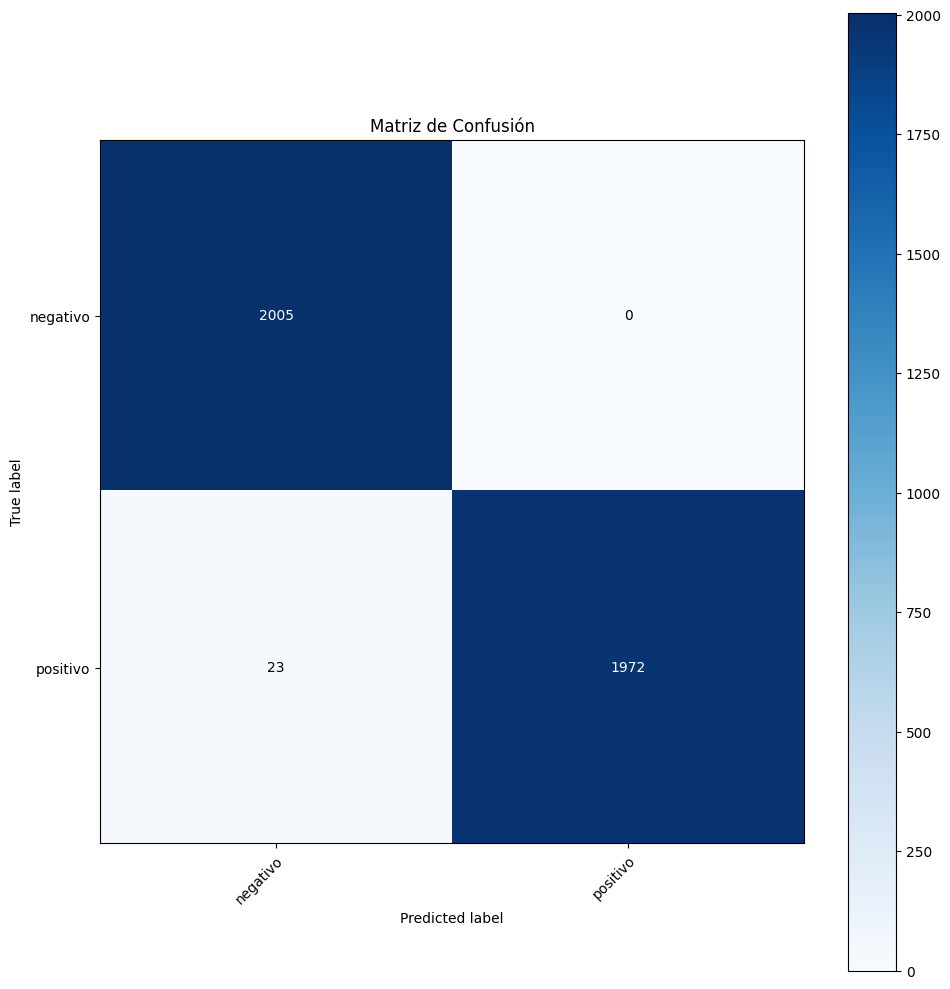

In [44]:
%matplotlib inline

classes = pipe_Bayes['classifier'].classes_

plot_confusion_matrix(y_true=y_train, y_pred=y_pred_train_Bayes, classes=classes,
                      title='Matriz de Confusión')

In [45]:
report_Bayes = classification_report(y_train, y_pred_train_Bayes)

print("Train Report for Support Vector Machines\n", report_Bayes)

Train Report for Support Vector Machines
               precision    recall  f1-score   support

    negativo       0.99      1.00      0.99      2005
    positivo       1.00      0.99      0.99      1995

    accuracy                           0.99      4000
   macro avg       0.99      0.99      0.99      4000
weighted avg       0.99      0.99      0.99      4000



¿Y si cambiamos el transformador y evaluamos los 3 transformadores que vimos?

In [46]:
parameters = {
              'transform':[CountVectorizer(binary=True,lowercase=False),CountVectorizer(lowercase=False),TfidfVectorizer(lowercase=False)],
              }

grid_search_Bayes = GridSearchCV(pipe_Bayes, parameters, scoring='precision_macro', cv=5, error_score=0.0)

In [47]:
%%time
grid_search_Bayes.fit(X_train,y_train)

CPU times: user 9min 11s, sys: 23.8 s, total: 9min 34s
Wall time: 9min 43s


GridSearchCV(cv=5, error_score=0.0,
             estimator=Pipeline(steps=[('preproccess', TextPreprocessing()),
                                       ('transform',
                                        TfidfVectorizer(lowercase=False)),
                                       ('to_dense', DenseTransformer()),
                                       ('classifier', GaussianNB())]),
             param_grid={'transform': [CountVectorizer(binary=True,
                                                       lowercase=False),
                                       CountVectorizer(lowercase=False),
                                       TfidfVectorizer(lowercase=False)]},
             scoring='precision_macro')

In [48]:
grid_search_Bayes.best_estimator_

Pipeline(steps=[('preproccess', TextPreprocessing()),
                ('transform', CountVectorizer(binary=True, lowercase=False)),
                ('to_dense', DenseTransformer()),
                ('classifier', GaussianNB())])

In [49]:
y_pred_train_MB = grid_search_Bayes.best_estimator_.predict(X_train)
report_MB = classification_report(y_train, y_pred_train_MB)

print("Train Report\n", report_MB)

Train Report
               precision    recall  f1-score   support

    negativo       0.99      1.00      0.99      2005
    positivo       1.00      0.99      0.99      1995

    accuracy                           0.99      4000
   macro avg       0.99      0.99      0.99      4000
weighted avg       0.99      0.99      0.99      4000



Ahora, realicemos una búsqueda más profunda.

In [50]:
grid_search_Bayes.best_estimator_

Pipeline(steps=[('preproccess', TextPreprocessing()),
                ('transform', CountVectorizer(binary=True, lowercase=False)),
                ('to_dense', DenseTransformer()),
                ('classifier', GaussianNB())])

In [51]:
parameters = {
                'transform':[CountVectorizer(binary=True, lowercase=False)],
               'classifier__var_smoothing': np.logspace(0,-9, num=10)
}

grid_search = GridSearchCV(pipe_Bayes, parameters, scoring='precision_macro', cv=5, error_score=0.0, verbose=2)

In [52]:
%%time
grid_search.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END classifier__var_smoothing=1.0, transform=CountVectorizer(binary=True, lowercase=False); total time=  37.0s


/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END classifier__var_smoothing=1.0, transform=CountVectorizer(binary=True, lowercase=False); total time=  36.0s
[CV] END classifier__var_smoothing=1.0, transform=CountVectorizer(binary=True, lowercase=False); total time=  34.2s


/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END classifier__var_smoothing=1.0, transform=CountVectorizer(binary=True, lowercase=False); total time=  35.2s


/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[CV] END classifier__var_smoothing=1.0, transform=CountVectorizer(binary=True, lowercase=False); total time=  35.5s
[CV] END classifier__var_smoothing=0.1, transform=CountVectorizer(binary=True, lowercase=False); total time=  36.8s
[CV] END classifier__var_smoothing=0.1, transform=CountVectorizer(binary=True, lowercase=False); total time=  34.4s
[CV] END classifier__var_smoothing=0.1, transform=CountVectorizer(binary=True, lowercase=False); total time=  34.6s
[CV] END classifier__var_smoothing=0.1, transform=CountVectorizer(binary=True, lowercase=False); total time=  35.1s
[CV] END classifier__var_smoothing=0.1, transform=CountVectorizer(binary=True, lowercase=False); total time=  37.3s
[CV] END classifier__var_smoothing=0.01, transform=CountVectorizer(binary=True, lowercase=False); total time=  35.8s
[CV] END classifier__var_smoothing=0.01, transform=CountVectorizer(binary=True, lowercase=False); total time=  34.1s
[CV] END classifier__var_smoothing=0.01, transform=CountVectorizer(bin

GridSearchCV(cv=5, error_score=0.0,
             estimator=Pipeline(steps=[('preproccess', TextPreprocessing()),
                                       ('transform',
                                        TfidfVectorizer(lowercase=False)),
                                       ('to_dense', DenseTransformer()),
                                       ('classifier', GaussianNB())]),
             param_grid={'classifier__var_smoothing': array([1.e+00, 1.e-01, 1.e-02, 1.e-03, 1.e-04, 1.e-05, 1.e-06, 1.e-07,
       1.e-08, 1.e-09]),
                         'transform': [CountVectorizer(binary=True,
                                                       lowercase=False)]},
             scoring='precision_macro', verbose=2)

In [53]:
grid_search.best_params_

{'classifier__var_smoothing': 0.01,
 'transform': CountVectorizer(binary=True, lowercase=False)}

Y obtengamos los resultados de nuestro mejor modelo.

In [54]:
best_model_Bayes = grid_search.best_estimator_

y_pred_train_MB = best_model_Bayes.predict(X_train)
report_MB = classification_report(y_train, y_pred_train_MB)

print("Train Report\n", report_MB)

Train Report
               precision    recall  f1-score   support

    negativo       0.72      1.00      0.83      2005
    positivo       1.00      0.60      0.75      1995

    accuracy                           0.80      4000
   macro avg       0.86      0.80      0.79      4000
weighted avg       0.86      0.80      0.79      4000



### AdaBoostClassifier

In [55]:
from sklearn.base import BaseEstimator
from scipy.sparse import issparse


class DenseTransformer(BaseEstimator):
    """Convert a sparse array into a dense array."""

    def __init__(self, return_copy=True):
        self.return_copy = return_copy
        self.is_fitted = False

    def transform(self, X, y=None):
        if issparse(X):
            return X.toarray()
        elif self.return_copy:
            return X.copy()
        else:
            return X

    def fit(self, X, y=None):
        return self

    def fit_transform(self, X, y=None):
        return self.transform(X=X, y=y)

In [56]:
%%time
estimators = [
        ('preproccess',TextPreprocessing()),
        ('transform',TfidfVectorizer(lowercase=False)),
        ('classifier', AdaBoostClassifier(random_state=0))          
    ]

pipe_ADA = Pipeline(estimators)

pipe_ADA.fit(X_train, y_train)

CPU times: user 36 s, sys: 131 ms, total: 36.1 s
Wall time: 36.4 s


Pipeline(steps=[('preproccess', TextPreprocessing()),
                ('transform', TfidfVectorizer(lowercase=False)),
                ('classifier', AdaBoostClassifier(random_state=0))])

In [57]:
y_pred_train_ADA = pipe_ADA.predict(X_train)
y_pred_train_ADA

array(['positivo', 'positivo', 'negativo', ..., 'negativo', 'negativo',
       'positivo'], dtype=object)

In [58]:
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues,size=(10,10)):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')



    fig, ax = plt.subplots(figsize=size)
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax


Y ya con nuestros clasificadores entrenados, podemos establecer nuestra **Matriz de Confusión**

Confusion matrix, without normalization


<Axes: title={'center': 'Matriz de Confusión'}, xlabel='Predicted label', ylabel='True label'>

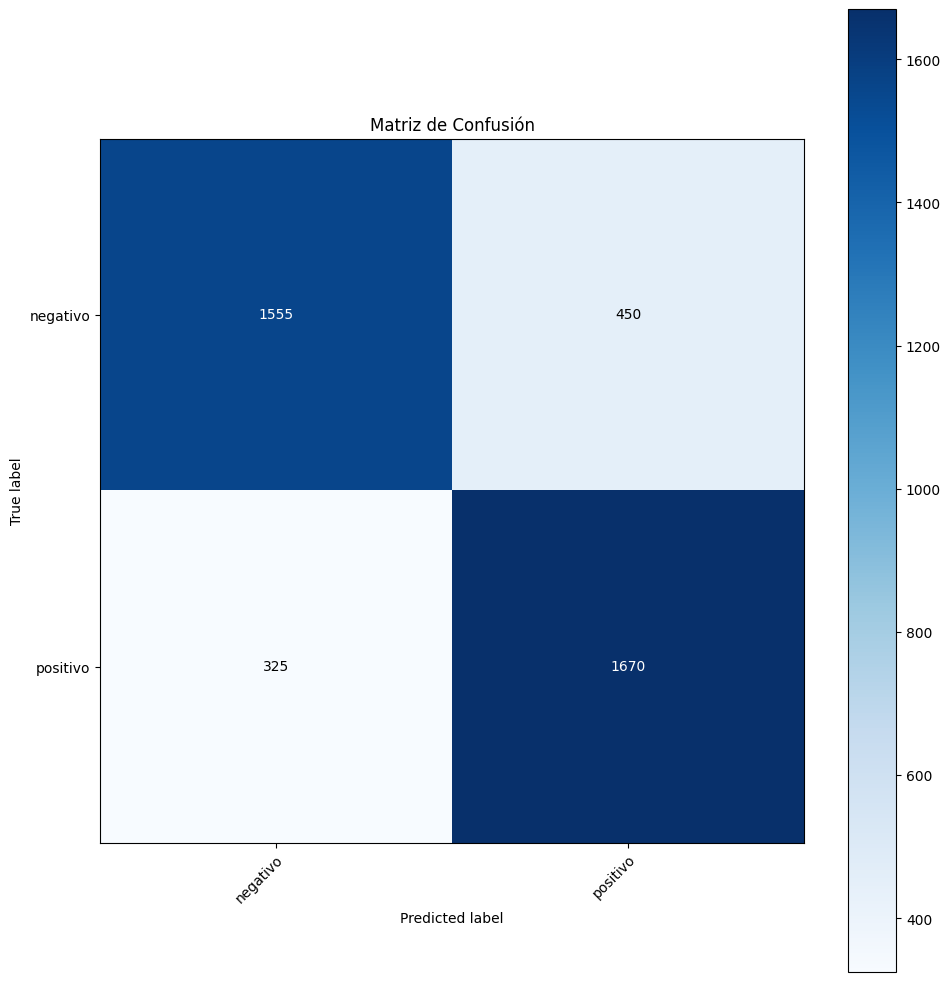

In [59]:
%matplotlib inline

classes = pipe_ADA['classifier'].classes_

plot_confusion_matrix(y_true=y_train, y_pred=y_pred_train_ADA, classes=classes,
                      title='Matriz de Confusión')

In [60]:
report_ADA = classification_report(y_train, y_pred_train_ADA)

print("Train Report for Support Vector Machines\n", report_ADA)

Train Report for Support Vector Machines
               precision    recall  f1-score   support

    negativo       0.83      0.78      0.80      2005
    positivo       0.79      0.84      0.81      1995

    accuracy                           0.81      4000
   macro avg       0.81      0.81      0.81      4000
weighted avg       0.81      0.81      0.81      4000



¿Y si cambiamos el transformador y evaluamos los 3 transformadores que vimos?

In [61]:
parameters = {
              'transform':[CountVectorizer(binary=True,lowercase=False),CountVectorizer(lowercase=False),TfidfVectorizer(lowercase=False)],
              }

grid_search_ADA = GridSearchCV(pipe_ADA, parameters, scoring='precision_macro', cv=5, error_score=0.0)

In [62]:
%%time
grid_search_ADA.fit(X_train,y_train)

CPU times: user 9min 21s, sys: 1.89 s, total: 9min 23s
Wall time: 9min 36s


GridSearchCV(cv=5, error_score=0.0,
             estimator=Pipeline(steps=[('preproccess', TextPreprocessing()),
                                       ('transform',
                                        TfidfVectorizer(lowercase=False)),
                                       ('classifier',
                                        AdaBoostClassifier(random_state=0))]),
             param_grid={'transform': [CountVectorizer(binary=True,
                                                       lowercase=False),
                                       CountVectorizer(lowercase=False),
                                       TfidfVectorizer(lowercase=False)]},
             scoring='precision_macro')

In [63]:
grid_search_ADA.best_estimator_

Pipeline(steps=[('preproccess', TextPreprocessing()),
                ('transform', CountVectorizer(binary=True, lowercase=False)),
                ('classifier', AdaBoostClassifier(random_state=0))])

In [64]:
y_pred_train_MB = grid_search_ADA.best_estimator_.predict(X_train)
report_MB = classification_report(y_train, y_pred_train_MB)

print("Train Report\n", report_MB)

Train Report
               precision    recall  f1-score   support

    negativo       0.83      0.77      0.80      2005
    positivo       0.79      0.84      0.81      1995

    accuracy                           0.81      4000
   macro avg       0.81      0.81      0.81      4000
weighted avg       0.81      0.81      0.81      4000



Ahora, realicemos una búsqueda más profunda.

In [65]:
parameters = {
               'transform':[CountVectorizer(binary=True,lowercase=False)],
               'classifier__n_estimators' : [10, 100, 1000],
               'classifier__learning_rate' : [(0.97 + x / 100) for x in range(0, 5)]
}

grid_search = GridSearchCV(pipe_ADA, parameters, scoring='precision_macro', cv=5, error_score=0.0, verbose=2)

In [66]:
%%time
grid_search.fit(X_train,y_train)

Fitting 5 folds for each of 15 candidates, totalling 75 fits
[CV] END classifier__learning_rate=0.97, classifier__n_estimators=10, transform=CountVectorizer(binary=True, lowercase=False); total time=  32.6s
[CV] END classifier__learning_rate=0.97, classifier__n_estimators=10, transform=CountVectorizer(binary=True, lowercase=False); total time=  32.4s
[CV] END classifier__learning_rate=0.97, classifier__n_estimators=10, transform=CountVectorizer(binary=True, lowercase=False); total time=  32.8s
[CV] END classifier__learning_rate=0.97, classifier__n_estimators=10, transform=CountVectorizer(binary=True, lowercase=False); total time=  32.9s
[CV] END classifier__learning_rate=0.97, classifier__n_estimators=10, transform=CountVectorizer(binary=True, lowercase=False); total time=  33.4s
[CV] END classifier__learning_rate=0.97, classifier__n_estimators=100, transform=CountVectorizer(binary=True, lowercase=False); total time=  36.6s
[CV] END classifier__learning_rate=0.97, classifier__n_estimat

GridSearchCV(cv=5, error_score=0.0,
             estimator=Pipeline(steps=[('preproccess', TextPreprocessing()),
                                       ('transform',
                                        TfidfVectorizer(lowercase=False)),
                                       ('classifier',
                                        AdaBoostClassifier(random_state=0))]),
             param_grid={'classifier__learning_rate': [0.97, 0.98, 0.99, 1.0,
                                                       1.01],
                         'classifier__n_estimators': [10, 100, 1000],
                         'transform': [CountVectorizer(binary=True,
                                                       lowercase=False)]},
             scoring='precision_macro', verbose=2)

In [67]:
grid_search.best_params_

{'classifier__learning_rate': 0.99,
 'classifier__n_estimators': 1000,
 'transform': CountVectorizer(binary=True, lowercase=False)}

Y obtengamos los resultados de nuestro mejor modelo.

In [68]:
best_model_ADA = grid_search.best_estimator_

y_pred_train_MB = best_model_ADA.predict(X_train)
report_MB = classification_report(y_train, y_pred_train_MB)

print("Train Report\n", report_MB)

Train Report
               precision    recall  f1-score   support

    negativo       1.00      1.00      1.00      2005
    positivo       1.00      1.00      1.00      1995

    accuracy                           1.00      4000
   macro avg       1.00      1.00      1.00      4000
weighted avg       1.00      1.00      1.00      4000



## 5. Rendimiento Test de los mejores modelos encontrados

Evaluemos como le fue con datos que el no conoce.

In [69]:
y_pred_test_GS = best_model.predict(test['review_es'] )
report_GS = classification_report(test['sentimiento'] , y_pred_test_GS)

print("Test Report Random Forest\n", report_GS)

Test Report Random Forest
               precision    recall  f1-score   support

    negativo       0.83      0.85      0.84       495
    positivo       0.85      0.83      0.84       505

    accuracy                           0.84      1000
   macro avg       0.84      0.84      0.84      1000
weighted avg       0.84      0.84      0.84      1000



In [70]:
y_pred_test_GS = best_model_Bayes.predict(test['review_es'] )
report_GS = classification_report(test['sentimiento'] , y_pred_test_GS)

print("Test Report Bayes\n", report_GS)

Test Report Bayes
               precision    recall  f1-score   support

    negativo       0.54      0.96      0.69       495
    positivo       0.84      0.21      0.34       505

    accuracy                           0.58      1000
   macro avg       0.69      0.59      0.52      1000
weighted avg       0.70      0.58      0.52      1000



In [71]:
y_pred_test_GS = best_model_ADA.predict(test['review_es'] )
report_GS = classification_report(test['sentimiento'] , y_pred_test_GS)

print("Test Report AdaBoost\n", report_GS)

Test Report AdaBoost
               precision    recall  f1-score   support

    negativo       0.79      0.81      0.80       495
    positivo       0.81      0.79      0.80       505

    accuracy                           0.80      1000
   macro avg       0.80      0.80      0.80      1000
weighted avg       0.80      0.80      0.80      1000



## Resultados

## Tablas Comparativas


||||
| - | - | - |
|**Modelo**|**Acc Training**|**Acc Test**|
|Random Forest|100%|84%|
|GaussianNB|80%|58%|
|AdaBoostClassifier|100%|80%|

## Conclusiones

Lo cual nos da a entender que el modelo que mejor se adapta a nuevos datos es Random Forest, además que sería la opción final para cumplir los objetivos impuestos en este trabajo. 

De una manera para mirar al futuro, se recomienda hacer un tratamiento de datos en los cuáles se eliminen ciertas palabras que tienen una importancia parecida tanto para comentarios positivos como negativos y así poder realizar  